## 2d intro plot stuff

In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ["XLA_PYTHON_CLIENT_ALLOCATOR"] = "platform"
os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "false"
os.environ['JAX_ENABLE_X64'] = '1'

cache_path = "../../cache/"

In [2]:
import numpy as np
import pickle
import tqdm
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import corc.tmm_plots


In [3]:
dataset_filename = 'intro_figure.pickle'
with open(cache_path + dataset_filename, 'rb') as f:
    X, y = pickle.load(f)

model_filename = "intro_figure_TMM-NEB.pickle"
with open(cache_path + model_filename, 'rb') as f:
    tmm_model = pickle.load(f)

y = np.array(y,dtype=int)
y_pred = np.array(tmm_model.predict(X),dtype=int)


/mnt/lustre-grete/tmp/u14643/ipykernel_1466103/2911105473.py:46: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_coolwarm = cm.get_cmap('coolwarm', levels)
/mnt/lustre-grete/tmp/u14643/ipykernel_1466103/2911105473.py:87: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  y_pred = np.array(y_pred, dtype=np.integer)


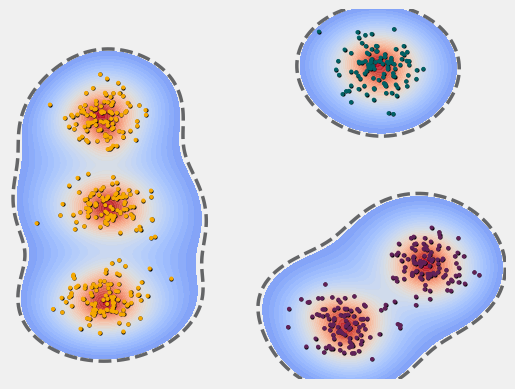

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import MaxNLocator
from matplotlib import cm

import corc.visualization

def plot_energy_landscape(
    mixture_model,
    data_X,  # For boundary computation
    threshold,
    grid_resolution=128,
    axis=None,
    levels=20,  # Default number of levels
    kwargs={}
):
    if axis is None:
        axis = plt.gca()

    # Grid coordinates
    margin = 1
    x_grid = np.linspace(
        data_X[:, 0].min() - margin, data_X[:, 0].max() + margin, grid_resolution
    )
    y_grid = np.linspace(
        data_X[:, 1].min() - margin, data_X[:, 1].max() + margin, grid_resolution
    )
    XY = np.stack(np.meshgrid(x_grid, y_grid), -1)

    # Get scores for the grid values
    mm_probs = mixture_model.score_samples(XY.reshape(-1, 2)).reshape(
        grid_resolution, grid_resolution
    )
    mm_probs = np.clip(mm_probs, None, 0)  # Clip values at 0

    # Determine contour levels using MaxNLocator
    locator = MaxNLocator(nbins=levels)
    contour_levels = locator.tick_values(np.min(mm_probs), np.max(mm_probs))
    
    # Define number of levels below and above the threshold
    num_levels_below = np.sum(contour_levels <= threshold)
    num_levels_above = len(contour_levels) - num_levels_below

    # Create coolwarm colormap for levels above the threshold with custom alpha
    cmap_coolwarm = cm.get_cmap('coolwarm', levels)
    coolwarm_colors = cmap_coolwarm(np.linspace(0, 1, levels))[-num_levels_above-7:]
    coolwarm_colors[:, -1] = 0.9  # Alpha for coolwarm

    # Use only the coolwarm colormap for levels above the threshold
    levels_above_threshold = contour_levels[contour_levels > threshold]
    cmap_combined = LinearSegmentedColormap.from_list('custom_colormap', coolwarm_colors)

    # Plot with modified colormap for levels above threshold
    axis.contourf(
        x_grid,
        y_grid,
        mm_probs,
        levels=levels_above_threshold,
        cmap=cmap_combined,
        zorder=-10,
        **kwargs
    )
    axis.contour(
        x_grid,
        y_grid,
        mm_probs,
        levels=[threshold],
        # colors="#612158",
        colors=corc.visualization.COLOR_DICT["black_75"],
        linewidths=2.5,  # Set the thickness of the line
        zorder=-5  # Specifies the drawing order
    )

colors_3=np.array([
        corc.visualization.COLOR_DICT["purple"],
        corc.visualization.COLOR_DICT["orange"],
        corc.visualization.COLOR_DICT["petrol"],
])


# Example usage (ensure X and tmm_model are defined)
fig, ax = plt.subplots()
fig.patch.set_facecolor('#F0F0F0')  # Using a lighter gray
plot_energy_landscape(tmm_model.mixture_model, X, threshold=-7.6, axis=ax, levels=50)
y_pred = tmm_model.predict_with_target(X,target_number_classes=3)
y_pred = np.array(y_pred, dtype=np.integer)
colors = colors_3[y_pred]
ax.scatter(X[:, 0], X[:, 1], c="black", s=4)
ax.scatter(X[:, 0], X[:, 1], color=colors_3[y_pred], s=4)
ax.axis('off')
plt.savefig("../../figures/intro_2d_3.pdf",bbox_inches='tight', pad_inches=0)
plt.show()

/mnt/lustre-grete/tmp/u14643/ipykernel_1466103/2911105473.py:46: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_coolwarm = cm.get_cmap('coolwarm', levels)


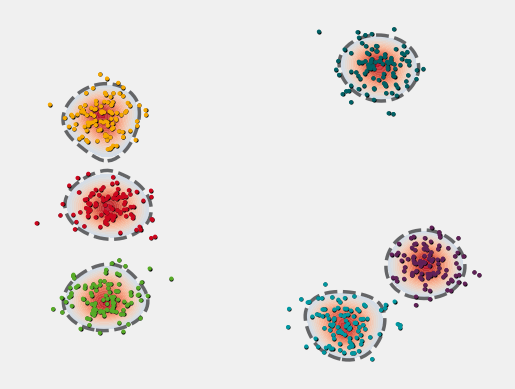

In [6]:
colors_6=np.array(
        [
          corc.visualization.COLOR_DICT["turquoise"],
          corc.visualization.COLOR_DICT["orange"],
          corc.visualization.COLOR_DICT["petrol"],
          corc.visualization.COLOR_DICT["green"],
          corc.visualization.COLOR_DICT["purple"],
          corc.visualization.COLOR_DICT["red"],
        ])
fig, ax = plt.subplots()
fig.patch.set_facecolor('#F0F0F0')  # Using a lighter gray
plot_energy_landscape(tmm_model.mixture_model, X, threshold=-5.7, axis=ax, levels=50)
ax.scatter(X[:, 0], X[:, 1], c="black", s=4)
y_pred = tmm_model.predict_with_target(X,target_number_classes=6)
ax.scatter(X[:, 0], X[:, 1], c=colors_6[y_pred], s=4)
ax.axis('off')
plt.savefig("../../figures/intro_2d_6.pdf", bbox_inches='tight', pad_inches=0)
plt.show()

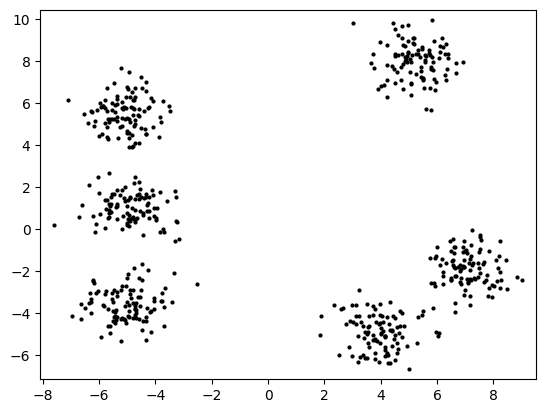

In [44]:
import matplotlib.pyplot as plt
import numpy as np

def plot_energy_landscape(
    mixture_model,
    data_X,  # for boundary computation
    threshold,
    levels=20,
    grid_resolution=128,
    axis=None,
    kwargs={},
):
    if axis is None:
        axis = plt.gca()

    # Grid coordinates
    margin = 0.5
    x_grid = np.linspace(
        data_X[:, 0].min() - margin, data_X[:, 0].max() + margin, grid_resolution
    )
    y_grid = np.linspace(
        data_X[:, 1].min() - margin, data_X[:, 1].max() + margin, grid_resolution
    )
    XY = np.stack(np.meshgrid(x_grid, y_grid), -1)

    # Get scores for the grid values
    mm_probs = mixture_model.score_samples(XY.reshape(-1, 2)).reshape(
        grid_resolution, grid_resolution
    )
    mm_probs = np.clip(mm_probs, None, 0)

    # Create levels for plotting
    levels_below = np.linspace(mm_probs.min(), threshold, levels)
    levels_above = np.linspace(threshold, mm_probs.max(), levels)

    # Mask the data arrays for separate treatments
    masked_data_below = np.ma.masked_less_equal(mm_probs, threshold)
    masked_data_above = np.ma.masked_greater(mm_probs, threshold)

    # Plot below the threshold in grayscale
    axis.contourf(
        x_grid,
        y_grid,
        masked_data_below,
        levels=levels_below,
        cmap="gray",
        alpha=0.2,
        zorder=-10,
        **kwargs
    )

    # Plot above the threshold in color
    axis.contourf(
        x_grid,
        y_grid,
        masked_data_above,
        levels=levels_above,
        cmap="coolwarm",
        alpha=0.5,
        zorder=-10,
        **kwargs
    )

# Example usage (assuming you have defined X and tmm_model appropriately)
ax = plt.gca()
plot_energy_landscape(tmm_model.mixture_model, X, threshold=-5.6, axis=ax)
ax.scatter(X[:, 0], X[:, 1], c="black", s=4)
plt.show()

/mnt/lustre-grete/tmp/u14643/ipykernel_1385140/2760902752.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_gray = cm.get_cmap('gray', num_levels_below)
/mnt/lustre-grete/tmp/u14643/ipykernel_1385140/2760902752.py:48: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_coolwarm = cm.get_cmap('coolwarm', num_levels_above)


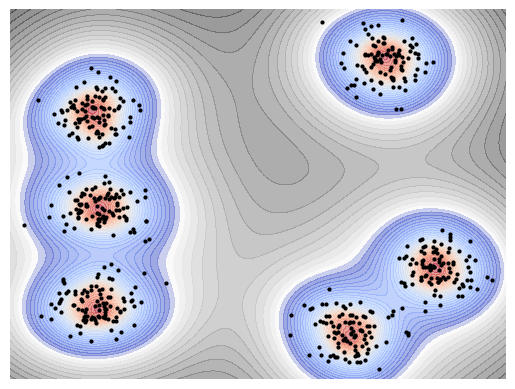

In [128]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import MaxNLocator
from matplotlib import cm

def plot_energy_landscape(
    mixture_model,
    data_X,  # For boundary computation
    threshold,
    grid_resolution=128,
    axis=None,
    levels=20,
    kwargs={}
):
    if axis is None:
        axis = plt.gca()

    # Grid coordinates
    margin = 0.5
    x_grid = np.linspace(
        data_X[:, 0].min() - margin, data_X[:, 0].max() + margin, grid_resolution
    )
    y_grid = np.linspace(
        data_X[:, 1].min() - margin, data_X[:, 1].max() + margin, grid_resolution
    )
    XY = np.stack(np.meshgrid(x_grid, y_grid), -1)

    # Get scores for the grid values
    mm_probs = mixture_model.score_samples(XY.reshape(-1, 2)).reshape(
        grid_resolution, grid_resolution
    )
    mm_probs = np.clip(mm_probs, None, 0)  # Clip values at 0
    
    # Determine contour levels using MaxNLocator
    locator = MaxNLocator(nbins=levels)
    concrete_levels = locator.tick_values(np.min(mm_probs), np.max(mm_probs))

    # Define number of levels below and above the threshold
    num_levels = len(concrete_levels)
    num_levels_below = np.sum(concrete_levels <= threshold)
    num_levels_above = num_levels - num_levels_below
    
    # Create grayscale colormap for levels below the threshold
    cmap_gray = cm.get_cmap('gray', num_levels_below)

    # Create coolwarm colormap for levels above the threshold
    cmap_coolwarm = cm.get_cmap('coolwarm', num_levels_above)

    # Combine both colormaps into a single colormap
    colors = np.vstack((cmap_gray(np.linspace(0, 1, num_levels_below)),
                        cmap_coolwarm(np.linspace(0, 1, num_levels_above))))
    cmap_combined = LinearSegmentedColormap.from_list('custom_colormap', colors)

    # Plot with modified colormap
    axis.contourf(
        x_grid,
        y_grid,
        mm_probs,
        levels=concrete_levels,
        cmap=cmap_combined,
        alpha=0.5,
        zorder=-10,
        **kwargs
    )

# Example usage (ensure X and tmm_model are defined)
ax = plt.gca()
# plot_energy_landscape(tmm_model.mixture_model, X, threshold=-5.6, axis=ax,  levels=50)
plot_energy_landscape(tmm_model.mixture_model, X, threshold=-7, axis=ax,  levels=50)
ax.scatter(X[:, 0], X[:, 1], c="black", s=4)
ax.axis("off")
plt.savefig("../../figures/intro_2d_3_fullColor.png", dpi=300)
plt.show()

/mnt/lustre-grete/tmp/u14643/ipykernel_1385140/2760902752.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_gray = cm.get_cmap('gray', num_levels_below)
/mnt/lustre-grete/tmp/u14643/ipykernel_1385140/2760902752.py:48: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_coolwarm = cm.get_cmap('coolwarm', num_levels_above)


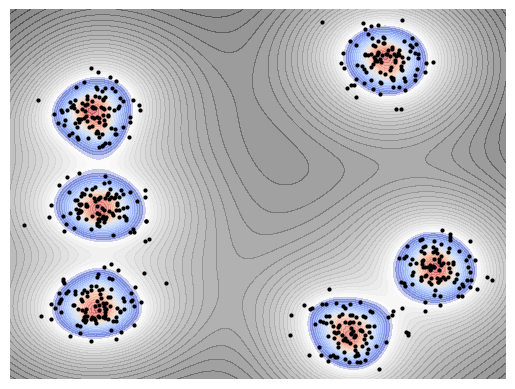

In [129]:
ax = plt.gca()
plot_energy_landscape(tmm_model.mixture_model, X, threshold=-5.6, axis=ax,  levels=50)
# plot_energy_landscape(tmm_model.mixture_model, X, threshold=-7, axis=ax,  levels=50)
ax.scatter(X[:, 0], X[:, 1], c="black", s=4)
ax.axis("off")
plt.savefig("../../figures/intro_2d_6_fullColor.png", dpi=300)
plt.show()

/mnt/lustre-grete/tmp/u14643/ipykernel_1385140/18426242.py:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_gray = cm.get_cmap('gray', levels*0.5)
/mnt/lustre-grete/tmp/u14643/ipykernel_1385140/18426242.py:53: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_coolwarm = cm.get_cmap('coolwarm', levels)


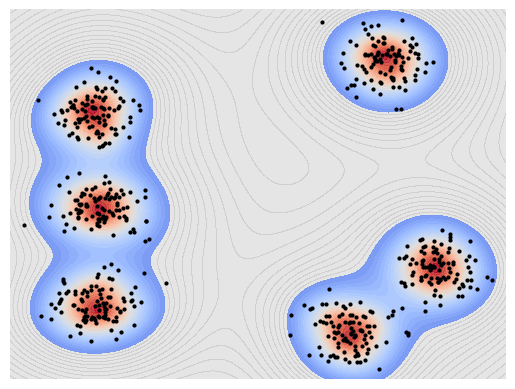

In [138]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import MaxNLocator
from matplotlib import cm

import corc.visualization

def plot_energy_landscape(
    mixture_model,
    data_X,  # For boundary computation
    threshold,
    grid_resolution=128,
    axis=None,
    levels=20,  # Default number of levels
    kwargs={}
):
    if axis is None:
        axis = plt.gca()

    # Grid coordinates
    margin = 0.5
    x_grid = np.linspace(
        data_X[:, 0].min() - margin, data_X[:, 0].max() + margin, grid_resolution
    )
    y_grid = np.linspace(
        data_X[:, 1].min() - margin, data_X[:, 1].max() + margin, grid_resolution
    )
    XY = np.stack(np.meshgrid(x_grid, y_grid), -1)

    # Get scores for the grid values
    mm_probs = mixture_model.score_samples(XY.reshape(-1, 2)).reshape(
        grid_resolution, grid_resolution
    )
    mm_probs = np.clip(mm_probs, None, 0)  # Clip values at 0

    # Determine contour levels using MaxNLocator
    locator = MaxNLocator(nbins=levels)
    contour_levels = locator.tick_values(np.min(mm_probs), np.max(mm_probs))
    # contour_levels = locator.tick_values(np.min(mm_probs), np.max(mm_probs)-2)
    
    # Define number of levels below and above the threshold
    num_levels_below = np.sum(contour_levels <= threshold)
    num_levels_above = len(contour_levels) - num_levels_below

    # Create grayscale colormap for levels below the threshold with custom alpha
    cmap_gray = cm.get_cmap('gray', levels*0.5)
    gray_colors = cmap_gray(np.linspace(0, 1, levels))[:num_levels_below+15]
    gray_colors[:, -1] = 0.2  # Alpha for grayscale
    gray_colors[:] = gray_colors[-1]

    # Create coolwarm colormap for levels above the threshold with custom alpha
    cmap_coolwarm = cm.get_cmap('coolwarm', levels)
    coolwarm_colors = cmap_coolwarm(np.linspace(0, 1, levels))[-num_levels_above-7:]
    coolwarm_colors[:, -1] = 0.9  # Alpha for coolwarm

    # Combine both colormaps into a single colormap
    colors = np.vstack((gray_colors, coolwarm_colors))
    cmap_combined = LinearSegmentedColormap.from_list('custom_colormap', colors)

    # Plot with modified colormap
    axis.contourf(
        x_grid,
        y_grid,
        mm_probs,
        levels=contour_levels,
        cmap=cmap_combined,
        zorder=-10,
        **kwargs
    )

# Example usage (ensure X and tmm_model are defined)
ax = plt.gca()
# plot_energy_landscape(tmm_model.mixture_model, X, threshold=-6, axis=ax, levels=50)
plot_energy_landscape(tmm_model.mixture_model, X, threshold=-7.7, axis=ax, levels=50)
ax.scatter(X[:, 0], X[:, 1], c="black", s=4)
ax.axis('off')
plt.savefig("../../figures/intro_2d_3.png", dpi=300)
plt.show()

/mnt/lustre-grete/tmp/u14643/ipykernel_1385140/69622164.py:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_gray = cm.get_cmap('gray', levels*0.5)
/mnt/lustre-grete/tmp/u14643/ipykernel_1385140/69622164.py:52: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_coolwarm = cm.get_cmap('coolwarm', levels)


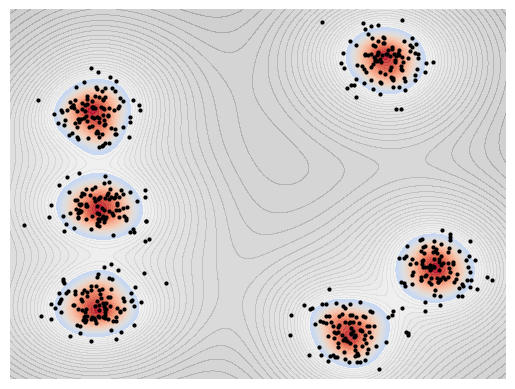

In [133]:

# Example usage (ensure X and tmm_model are defined)
ax = plt.gca()
plot_energy_landscape(tmm_model.mixture_model, X, threshold=-6, axis=ax, levels=50)
# plot_energy_landscape(tmm_model.mixture_model, X, threshold=-7.7, axis=ax, levels=50)
ax.scatter(X[:, 0], X[:, 1], c="black", s=4)
ax.axis('off')
plt.savefig("../../figures/intro_2d_6.png", dpi=300)
plt.show()

/mnt/lustre-grete/tmp/u14643/ipykernel_1385140/69622164.py:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_gray = cm.get_cmap('gray', levels*0.5)
/mnt/lustre-grete/tmp/u14643/ipykernel_1385140/69622164.py:52: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_coolwarm = cm.get_cmap('coolwarm', levels)


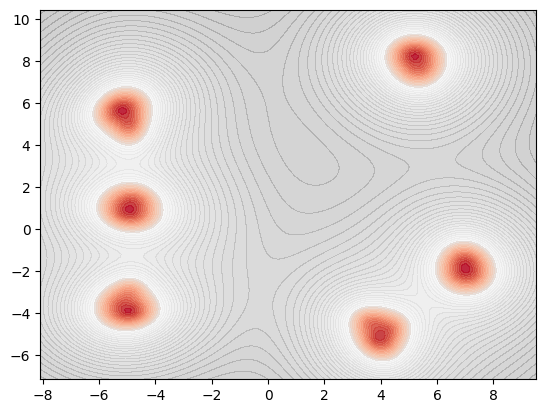

In [134]:
ax = plt.gca()
plot_energy_landscape(tmm_model.mixture_model, X, threshold=-5, axis=ax, levels=50)
plt.show()

In [5]:
import corc.graph_metrics
import corc.graph_metrics.neb


tmm_model = corc.graph_metrics.neb.NEB(
    data=X,
    labels=y,
    n_components=15,
    optimization_iterations=250,
    min_cluster_size=8,
    max_elongation=100,
    tmm_regularization=1e-2,
)
tmm_model.fit(X)

Mixture model fit took 0.51 seconds.
[[48  1]
 [71  1]
 [65  1]
 [21  1]
 [37  1]
 [64  1]
 [63  1]
 [50  1]
 [22  1]
 [35  1]
 [35  1]
 [31  1]
 [30  2]
 [12  1]
 [16  1]]
After filtering 15 components, we are left with 15 components


t-NEB: 100%|██████████| 1/1 [00:04<00:00,  4.48s/it]


In [6]:
model_filename = "intro_figure_TMM-NEB.pickle"
with open(cache_path + model_filename, 'wb') as f:
    pickle.dump(tmm_model, f)

-9.217184109560527 -2.5872297215056634


(-8.09301387205526, 9.521545940698898, -7.15871218592652, 10.451801925071418)

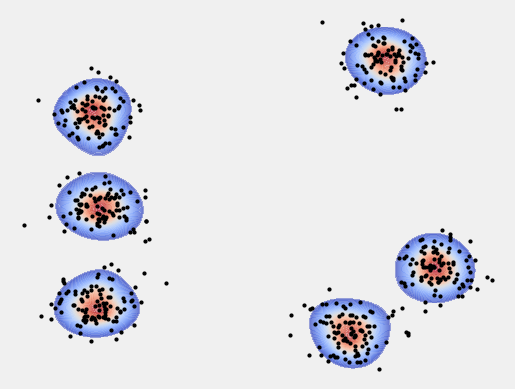

In [ ]:
def plot_energy_landscape(
        mixture_model,
        data_X,  # for boundary computation
        threshold,
        levels=20,
        grid_resolution=128,
        axis=None,
        kwargs={},
    ):
        if axis == None:
            axis = plt.gca()

        # grid coordinates
        margin = 0.5
        x_grid = np.linspace(
            data_X[:, 0].min() - margin, data_X[:, 0].max() + margin, grid_resolution
        )
        y_grid = np.linspace(
            data_X[:, 1].min() - margin, data_X[:, 1].max() + margin, grid_resolution
        )
        XY = np.stack(np.meshgrid(x_grid, y_grid), -1)

        # get scores for the grid values
        mm_probs = mixture_model.score_samples(XY.reshape(-1, 2)).reshape(
            grid_resolution, grid_resolution
        )
        mm_probs = np.clip(mm_probs, None, 0)
        # plotting the energy landscape

        # Create levels below and above the threshold
        levels_below = np.linspace(mm_probs.min(), threshold, 50)
        levels_above = np.linspace(threshold, mm_probs.max(), 50)

        print(mm_probs.min(), mm_probs.max())

        # Plot below the threshold in black and white
        # axis.contourf(
        #     x_grid,
        #     y_grid,
        #     mm_probs,
        #     levels=levels_below,
        #     cmap="gray",
        #     alpha=0.2,
        #     zorder=-10
        # )
        # axis.set_facecolor("#F0F0F0")

        # Plot above the threshold in color
        axis.contourf(
            x_grid,
            y_grid,
            mm_probs,
            levels=levels_above,
            cmap="coolwarm",
            alpha=0.5,
            zorder=-10
        )

plt.gcf().patch.set_facecolor('#F0F0F0')  # Using a lighter gray
ax = plt.gca()
plot_energy_landscape(tmm_model.mixture_model, X, -5.6, axis=ax)
ax.scatter(X[:,0],X[:,1],c="black",s=4)
ax.axis("off")